# 示例一：

## 1.导入依赖包

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

## 2.加载数据集并改变图片维度

In [2]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.fashion_mnist.load_data()
train_x = np.expand_dims(train_x, -1)
test_x = np.expand_dims(test_x, -1)

## 3.搭建模型

In [3]:
model = tf.keras.Sequential()
model.add(Conv2D(24, kernel_size=5, padding='same', activation='relu',
                 input_shape=(28, 28, 1)))
model.add(MaxPool2D())

model.add(Conv2D(48, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(48, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(48, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPool2D(padding='same'))

model.add(Conv2D(64, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPool2D(padding='same'))

model.add(Conv2D(64, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPool2D(padding='same'))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

## 4.定义优化器、损失函数和评价指标

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

## 5.训练模型

In [5]:
history = model.fit(train_x, train_y, epochs=5, validation_data=(test_x, test_y))
print(history.history.keys())

Epoch 1/5
1875/1875 [==============================] - 29s 11ms/step - loss: 0.5456 - acc: 0.7950 - val_loss: 0.4809 - val_acc: 0.8344
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3313 - acc: 0.8799 - val_loss: 0.3169 - val_acc: 0.8863
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2847 - acc: 0.8981 - val_loss: 0.3305 - val_acc: 0.8935
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2598 - acc: 0.9074 - val_loss: 0.3085 - val_acc: 0.8951
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2426 - acc: 0.9134 - val_loss: 0.2921 - val_acc: 0.8980
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


## 6.绘制准确率变化情况

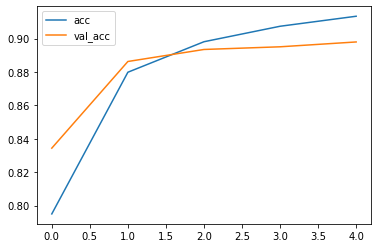

In [6]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()
plt.show()

## 7.绘制模型损失变化情况

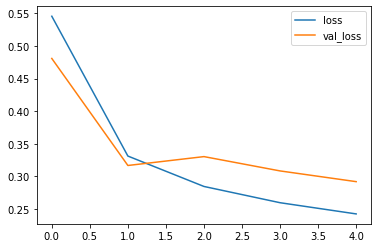

In [7]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()
plt.show()

# 示例二：增加数据增广

## 1.导入依赖包

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Flatten, Dense, BatchNormalization, Dropout

## 2.加载数据集并改变图片维度

In [9]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.fashion_mnist.load_data()
train_x = np.expand_dims(train_x, -1)
test_x = np.expand_dims(test_x, -1)

## 3.数据增广

In [10]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,
    width_shift_range=0.1,
    height_shift_range=0.1)

## 4.定义模型

In [11]:
model = tf.keras.Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

## 5.定义优化器、损失函数和评价指标

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

## 6.将图片进行数据增广

In [13]:
datagen.fit(train_x)

## 7.训练模型

In [14]:
history = model.fit(datagen.flow(train_x, train_y, batch_size=32),
                    epochs=5, validation_data=(test_x, test_y))
print(history.history.keys())

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.7394 - acc: 0.7268 - val_loss: 0.4579 - val_acc: 0.8278
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5184 - acc: 0.8094 - val_loss: 0.3697 - val_acc: 0.8664
Epoch 3/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.4559 - acc: 0.8327 - val_loss: 0.3382 - val_acc: 0.8733
Epoch 4/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.4156 - acc: 0.8490 - val_loss: 0.3356 - val_acc: 0.8741
Epoch 5/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.3845 - acc: 0.8610 - val_loss: 0.2887 - val_acc: 0.8933
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


## 8.绘制准确率变化情况

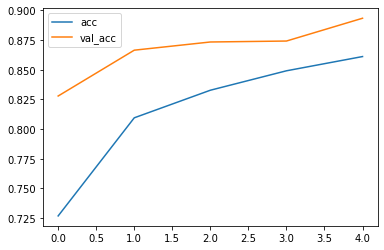

In [15]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()
plt.show()

## 9.绘制模型损失变化情况

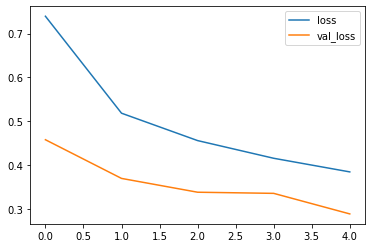

In [16]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()
plt.show()